In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions

from Bio.PDB.PDBParser import PDBParser
sys.path.insert(0, '/Users/weilu/Research/opt_server/')
from pyCodeLib import *
%matplotlib inline
plt.rcParams['figure.figsize'] = np.array([10,6.180])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
def get_filtered_gamma(pre, cutoff, pp):
    # pp = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0"
    # pp = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"

    A_name = pp + "_A"
    B_name = pp + "_B"
    B_filtered_name = pp + "_B_filtered"
    P_name = pp + "_P"
    Gamma_name = pp + "_gamma"
    Gamma_filtered_name = pp + "_gamma_filtered"
    Lamb_name = pp + "_lamb"
    Lamb_filtered_name = pp + "_lamb_filtered"

    A = np.loadtxt(pre+A_name)
    B = np.loadtxt(pre+B_name)
    B_filtered = np.loadtxt(pre+B_filtered_name, dtype=complex, converters={
                               0: lambda s: complex(s.decode().replace('+-', '-'))})
    Gamma = np.loadtxt(pre+Gamma_name)
    Gamma_filtered = np.loadtxt(pre+Gamma_filtered_name, dtype=complex, converters={
                               0: lambda s: complex(s.decode().replace('+-', '-'))})
    Lamb = np.loadtxt(pre+Lamb_name, dtype=complex, converters={
                               0: lambda s: complex(s.decode().replace('+-', '-'))})
    Lamb_filtered = np.loadtxt(pre+Lamb_filtered_name, dtype=complex, converters={
                               0: lambda s: complex(s.decode().replace('+-', '-'))})

    half_B_name = pp + "_half_B"
    half_B = np.loadtxt(pre+half_B_name)
    other_half_B_name = pp + "_other_half_B"
    other_half_B = np.loadtxt(pre+other_half_B_name)
    std_half_B_name = pp + "_std_half_B"
    std_half_B = np.loadtxt(pre+std_half_B_name)


    # pre = "/Users/weilu/Research/server/april_2019/"
    # location = pre + f"../../phis/{pp}_phi_decoy_summary.txt"
    location = pre + pp + "_A_prime"
    A_prime = np.loadtxt(location)

    lamb, P = np.linalg.eig(B)
    lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)
    filtered_lamb = np.copy(lamb)
    cutoff_mode = cutoff
    filtered_B_inv, filtered_lamb, P = get_filtered_B_inv_lambda_and_P(filtered_lamb,
                                                                       cutoff_mode, P)
    filtered_gamma = np.dot(filtered_B_inv, A)
    filtered_B = np.linalg.inv(filtered_B_inv)

    return A, A_prime, filtered_gamma, filtered_B_inv

In [ ]:
def get_filtered_gamma(pre, cutoff, pp):
    # pp = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0"
    # pp = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"

    A_name = pp + "_A"
    B_name = pp + "_B"

    A = np.loadtxt(pre+A_name)
    B = np.loadtxt(pre+B_name)


    half_B_name = pp + "_half_B"
    half_B = np.loadtxt(pre+half_B_name)
    other_half_B_name = pp + "_other_half_B"
    other_half_B = np.loadtxt(pre+other_half_B_name)
    std_half_B_name = pp + "_std_half_B"
    std_half_B = np.loadtxt(pre+std_half_B_name)


    # pre = "/Users/weilu/Research/server/april_2019/"
    # location = pre + f"../../phis/{pp}_phi_decoy_summary.txt"
    location = pre + pp + "_A_prime"
    A_prime = np.loadtxt(location)

    lamb, P = np.linalg.eig(B)
    lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)
    filtered_lamb = np.copy(lamb)
    cutoff_mode = cutoff
    filtered_B_inv, filtered_lamb, P = get_filtered_B_inv_lambda_and_P(filtered_lamb,
                                                                       cutoff_mode, P)
    filtered_gamma = np.dot(filtered_B_inv, A)
    filtered_B = np.linalg.inv(filtered_B_inv)

    return A, A_prime, filtered_gamma, filtered_B_inv

In [7]:
pre = "/Users/weilu/Research/server/aug_2020/curated_single_chain_optimization/optimization_decoyN2000/gammas/"
# pp = "quick_126"
pp = "complete_protein_list_phi_gxxxg_v5_well420"
cutoff_i = 300
A, A_prime, filtered_gamma, filtered_B_inv = get_filtered_gamma(pre, cutoff_i, pp)
# c = np.dot(A_prime, original_gamma_deybe)
c = -100 
# if args.constant == 0.0:
#     c = np.dot(A_prime, original_gamma)
# else:
#     c = args.constant
# print("A' gamma = constant:", c)
# do(f"echo 'c {c}\n' >> constant_log")
B_inv = filtered_B_inv
lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime))
gamma_new = B_inv.dot(A-A_prime*lambda_2)








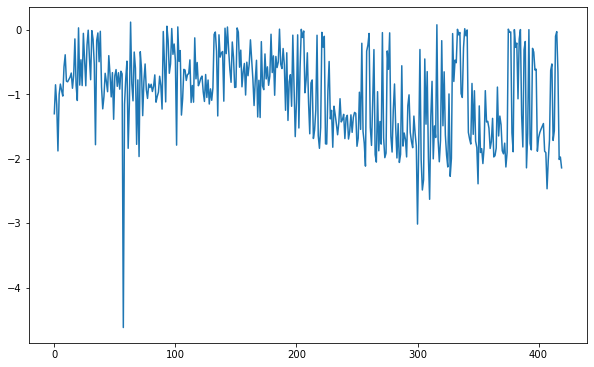

In [8]:
# cutoff 300
plt.plot(gamma_new)

In [9]:
pre = "/Users/weilu/Research/server/aug_2020/curated_single_chain_optimization/optimization_decoyN2000/gammas/"
# pp = "quick_126"
pp = "complete_protein_list_phi_gxxxg_v5_well420"
cutoff_i = 400
A, A_prime, filtered_gamma, filtered_B_inv = get_filtered_gamma(pre, cutoff_i, pp)
# c = np.dot(A_prime, original_gamma_deybe)
c = -100 
# if args.constant == 0.0:
#     c = np.dot(A_prime, original_gamma)
# else:
#     c = args.constant
# print("A' gamma = constant:", c)
# do(f"echo 'c {c}\n' >> constant_log")
B_inv = filtered_B_inv
lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime))
gamma_new = B_inv.dot(A-A_prime*lambda_2)







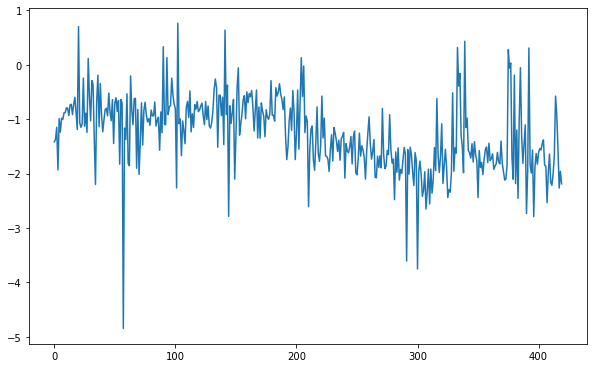

In [10]:
# cutoff 400
plt.plot(gamma_new)

In [11]:
np.savetxt("/Users/weilu/Research/server/aug_2020/membrane_protein_structure_prediction/curated_sc_v1.dat", -gamma_new)

In [76]:
pre = "/Users/weilu/Research/server/aug_2020/cluster20_shuffle_optimization/optimization_decoyN2000/combined_gammas/"
# pp = "quick_126"
pp = "aug07"
cutoff_i = 400
A, A_prime, filtered_gamma, filtered_B_inv = get_filtered_gamma(pre, cutoff_i, pp)
# c = np.dot(A_prime, original_gamma_deybe)
c = -200 
# if args.constant == 0.0:
#     c = np.dot(A_prime, original_gamma)
# else:
#     c = args.constant
# print("A' gamma = constant:", c)
# do(f"echo 'c {c}\n' >> constant_log")
B_inv = filtered_B_inv
lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime))
gamma_new = B_inv.dot(A-A_prime*lambda_2)






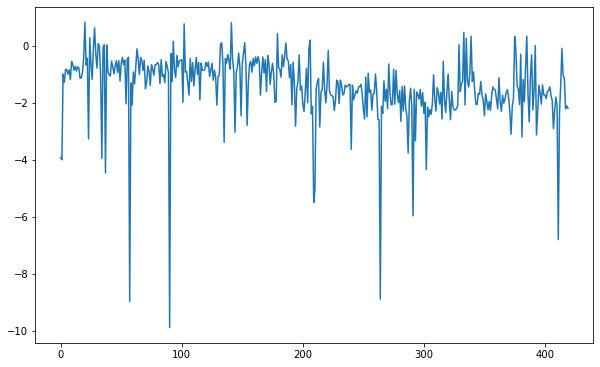

In [77]:
# cutoff 400
plt.plot(gamma_new)

In [84]:
info = pd.read_csv("/Users/weilu/Research/database/gxxxg_index_dic_v5.csv", index_col=0)
interaction_index_dic = {}
n = 20
for i, line in info.iterrows():
    # print(i, line["i"])
    interaction_index_dic[f"{line['Direction']}_{line['i']}"] = line["Group"]

In [83]:
gamma = np.loadtxt("/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/cluster20.dat")

In [85]:
gamma.shape

(420,)

In [88]:
info.query('res1=="GLY"')

,index,i,res1,res2,order,Direction,Group
100,11,100,GLY,ALA,4249.0,parallel,3
101,144,101,GLY,CYS,487.0,parallel,2
102,324,102,GLY,ASP,69.0,parallel,13
103,284,103,GLY,GLU,125.0,parallel,13
104,49,104,GLY,PHE,1892.0,parallel,7
105,1,105,GLY,GLY,6447.0,parallel,3
106,244,106,GLY,HIS,189.0,parallel,10
107,31,107,GLY,ILE,2609.0,parallel,7
108,279,108,GLY,LYS,131.0,parallel,13
109,23,109,GLY,LEU,3182.0,parallel,12


In [4]:
pre = "/Users/weilu/Research/server/aug_2020/cluster20_shuffle_optimization/optimization_decoyN2000/combined_gammas/"
# pp = "quick_126"
pp = "aug07"
cutoff_i = 300
A, A_prime, filtered_gamma, filtered_B_inv = get_filtered_gamma(pre, cutoff_i, pp)
# c = np.dot(A_prime, original_gamma_deybe)
c = -100 
# if args.constant == 0.0:
#     c = np.dot(A_prime, original_gamma)
# else:
#     c = args.constant
# print("A' gamma = constant:", c)
# do(f"echo 'c {c}\n' >> constant_log")
B_inv = filtered_B_inv
lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime))
gamma_new = B_inv.dot(A-A_prime*lambda_2)






In [10]:
np.dot(A_prime, gamma_new)

-100.00000000000004

In [9]:
np.savetxt("/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/cluster20_e100.dat", -gamma_new)

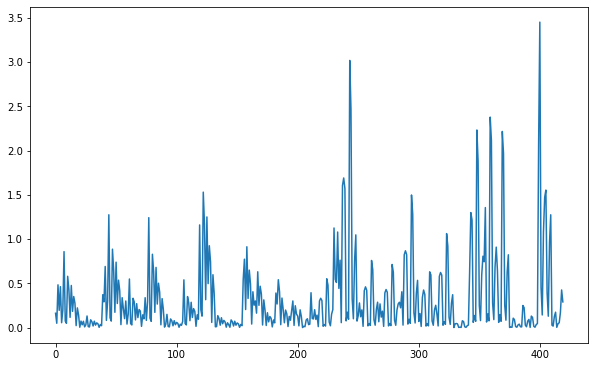

In [7]:
plt.plot(A_prime)

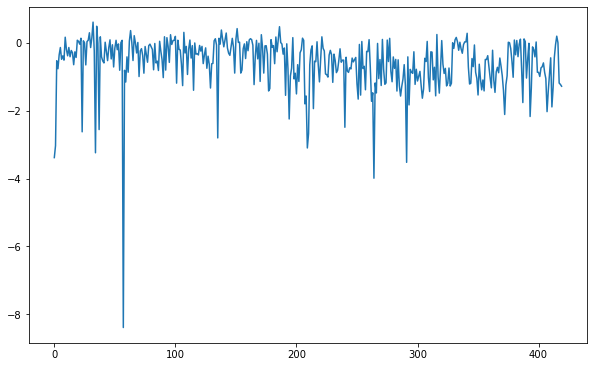

In [5]:
# cutoff 300
plt.plot(gamma_new)

In [80]:
pre = "/Users/weilu/Research/server/aug_2020/cluster20_shuffle_optimization/optimization_decoyN2000/combined_gammas/"
# pp = "quick_126"
pp = "aug07"
cutoff_i = 300
A, A_prime, filtered_gamma, filtered_B_inv = get_filtered_gamma(pre, cutoff_i, pp)
# c = np.dot(A_prime, original_gamma_deybe)
c = -200 
# if args.constant == 0.0:
#     c = np.dot(A_prime, original_gamma)
# else:
#     c = args.constant
# print("A' gamma = constant:", c)
# do(f"echo 'c {c}\n' >> constant_log")
B_inv = filtered_B_inv
lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime))
gamma_new = B_inv.dot(A-A_prime*lambda_2)





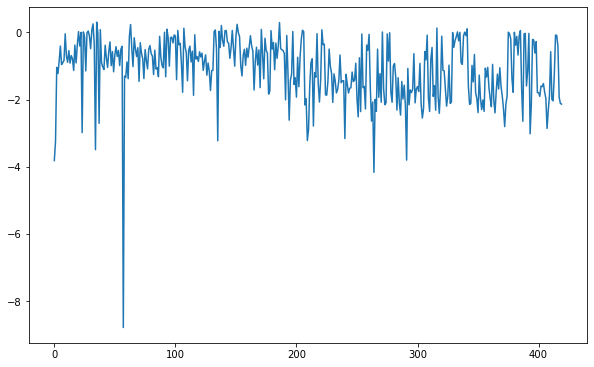

In [81]:
# cutoff 300
plt.plot(gamma_new)

In [82]:
np.savetxt("/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/cluster20.dat", -gamma_new)

In [78]:
pre = "/Users/weilu/Research/data/combined_gammas/"
# pp = "quick_126"
pp = "quick_324_v2"
cutoff_i = 300
A, A_prime, filtered_gamma, filtered_B_inv = get_filtered_gamma(pre, cutoff_i, pp)
# c = np.dot(A_prime, original_gamma_deybe)
c = -200 
# if args.constant == 0.0:
#     c = np.dot(A_prime, original_gamma)
# else:
#     c = args.constant
# print("A' gamma = constant:", c)
# do(f"echo 'c {c}\n' >> constant_log")
B_inv = filtered_B_inv
lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime))
gamma_new = B_inv.dot(A-A_prime*lambda_2)




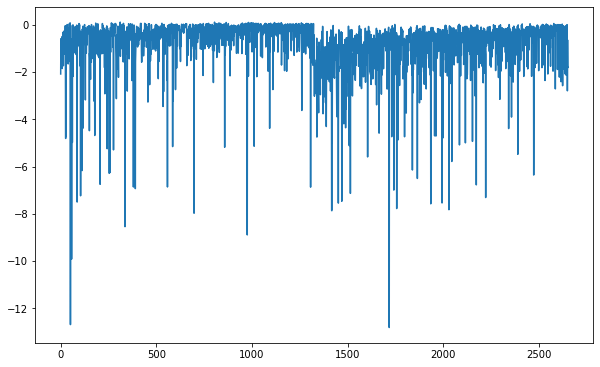

In [79]:
# cutoff 300
plt.plot(gamma_new)

In [67]:
np.savetxt("/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/top50_cutoff300_v3.dat", -gamma_new)

In [69]:
t = np.loadtxt("/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/top50_cutoff300_v2.dat")

In [71]:
np.savetxt("/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/top50_cutoff300_v2_rev.dat", -t)

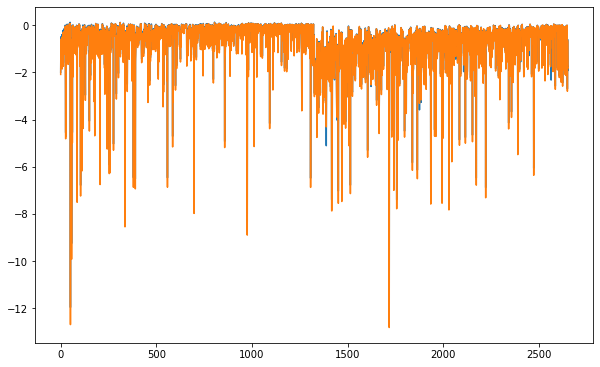

In [72]:
plt.plot(t)
plt.plot(gamma_new)

In [57]:
pre = "/Users/weilu/Research/data/combined_gammas/"
# pp = "quick_126"
pp = "quick_324"
cutoff_i = 300
A, A_prime, filtered_gamma, filtered_B_inv = get_filtered_gamma(pre, cutoff_i, pp)
# c = np.dot(A_prime, original_gamma_deybe)
c = -200
# if args.constant == 0.0:
#     c = np.dot(A_prime, original_gamma)
# else:
#     c = args.constant
# print("A' gamma = constant:", c)
# do(f"echo 'c {c}\n' >> constant_log")
B_inv = filtered_B_inv
lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime))
gamma_new = B_inv.dot(A-A_prime*lambda_2)



In [59]:
gamma_300 = gamma_new

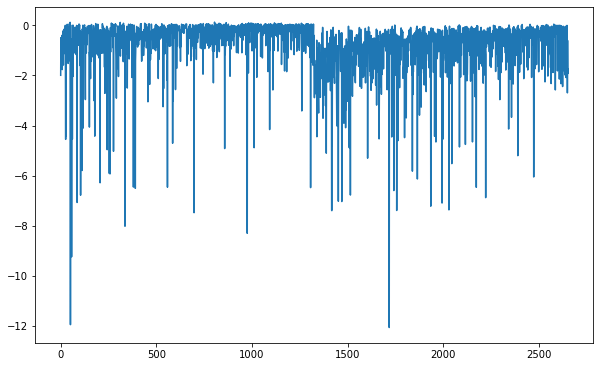

In [58]:
# cutoff 300
plt.plot(gamma_new)

In [62]:
pre = "/Users/weilu/Research/data/combined_gammas/"
# pp = "quick_126"
pp = "quick_324"
cutoff_i = 300
A, A_prime, filtered_gamma, filtered_B_inv = get_filtered_gamma(pre, cutoff_i, pp)
# c = np.dot(A_prime, original_gamma_deybe)
c = -200
# if args.constant == 0.0:
#     c = np.dot(A_prime, original_gamma)
# else:
#     c = args.constant
# print("A' gamma = constant:", c)
# do(f"echo 'c {c}\n' >> constant_log")
B_inv = filtered_B_inv
lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime))
gamma_new = B_inv.dot(A-A_prime*lambda_2)




KeyboardInterrupt: 

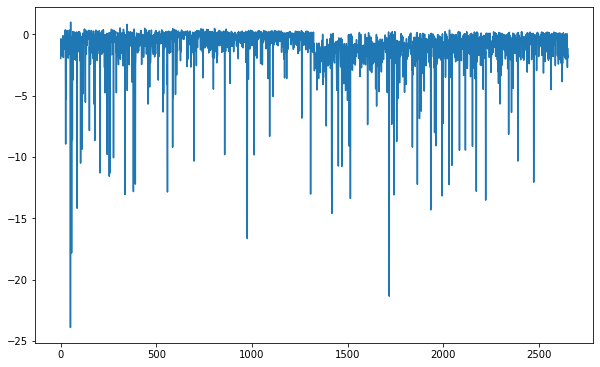

In [61]:
# cutoff 1000
plt.plot(gamma_new)

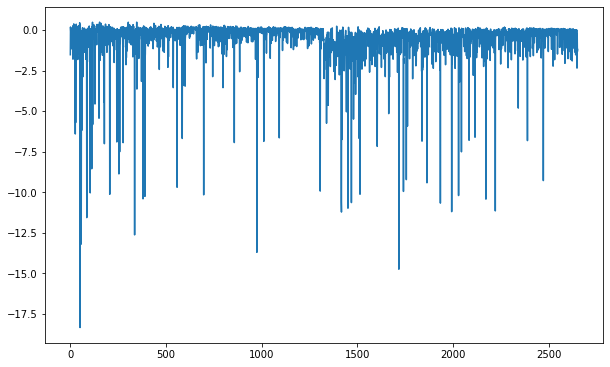

In [24]:
# cutoff 300
plt.plot(gamma_new)

In [63]:
np.savetxt("/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/top50_cutoff300_v2.dat", gamma_300)

In [26]:
np.savetxt("/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/top50_cutoff300.dat", -gamma_new)

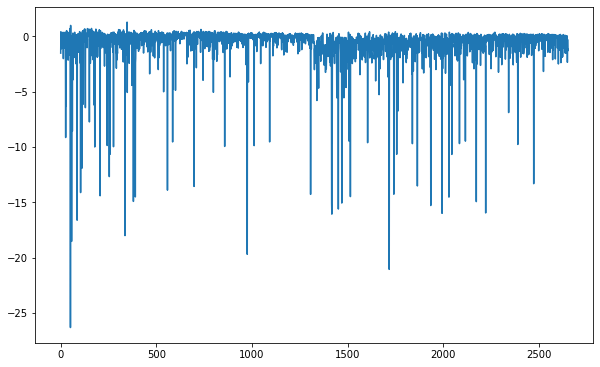

In [22]:
# cutoff 600
plt.plot(gamma_new)

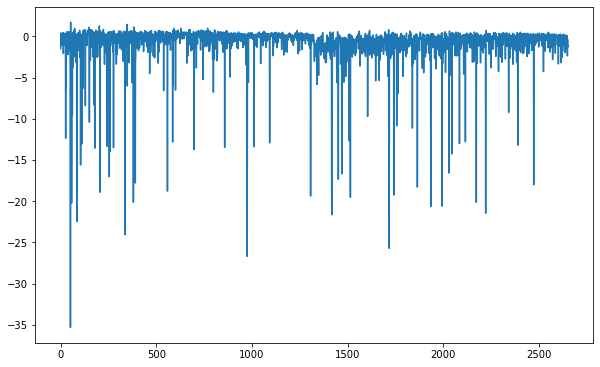

In [20]:
# cutoff 1000
plt.plot(gamma_new)

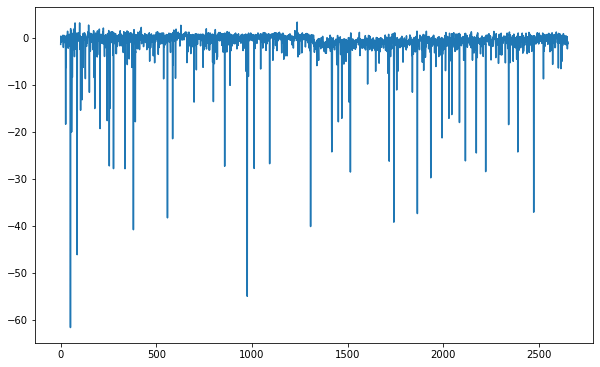

In [18]:
# cutoff 2000
plt.plot(gamma_new)

In [ ]:
g_list = []
for cutoff in [100, 200, 300, 400, 500, 600, 700]:
    g = np.loadtxt(f"/Users/weilu/Research/server/jul_week1_2020/head700_gxxxg_shuffle_optimization/optimization_decoyN2000/saved_gammas/filtered_protein_list_cutoff{cutoff}_impose_Aprime_constraint")
    g_list.append(g)

In [ ]:
plt.plot(gamma_new)

In [7]:
gamma = np.loadtxt("/Users/weilu/Research/server/jul_week1_2020/top50_among400_shuffle_optimization/optimization_decoyN2000/combined_gammas/quick_4_gamma")

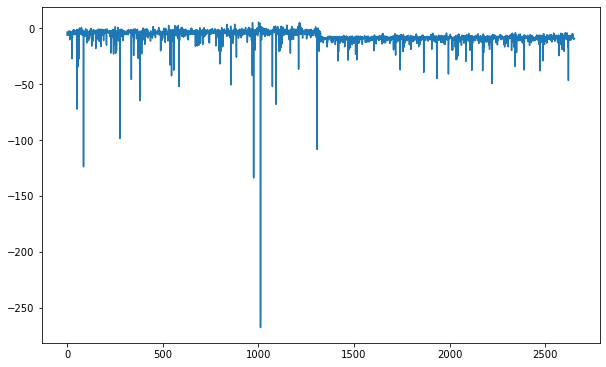

In [8]:
plt.plot(gamma)

In [11]:
gamma = np.loadtxt("/Users/weilu/Research/server/jul_week1_2020/top50_among400_shuffle_optimization/optimization_decoyN2000/combined_gammas/quick_126_gamma_filtered")

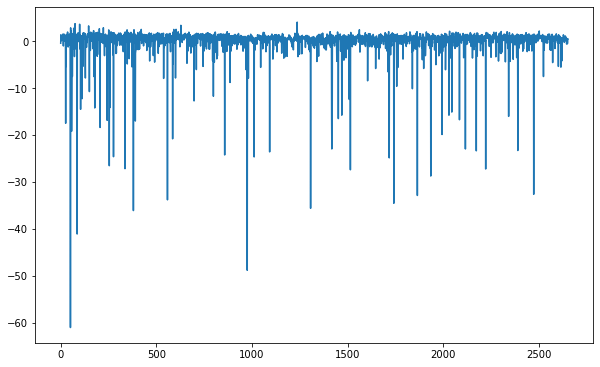

In [12]:
plt.plot(gamma)

In [9]:
# data = pd.read_csv("/Users/weilu/Research/database/info_interaction_cutoff65_complete.csv", index_col=0)
data = pd.read_csv("/Users/weilu/Research/database/para_anti_para_with_six_letter_code.csv", index_col=0)

In [33]:
data.head()

,index,Index1_1,Res1_1,Index2_1,Res2_1,Index1_2,Res1_2,Index2_2,Res2_2,Res1,Chain1,Res2,Chain2,rij,rij_2,Protein,Direction,interaction_index,code
0,11,5,MET,52,LEU,9,ILE,48,PHE,44,A,95,A,6.376584,6.274799,3cap,anti,12,301
1,13,5,MET,48,PHE,9,ILE,44,VAL,44,A,91,A,5.375535,5.421462,3cap,anti,12,301
2,22,8,LEU,48,PHE,12,GLY,44,VAL,47,A,91,A,4.412404,5.269533,3cap,anti,77,100201
3,24,9,ILE,49,THR,13,PHE,45,PHE,48,A,92,A,5.495952,5.990161,3cap,anti,39,10102
4,30,12,GLY,44,VAL,16,ASN,40,ASP,51,A,87,A,5.269533,3.804606,3cap,anti,76,100120


In [10]:
similar_size_protein_list = data["Protein"].value_counts().reset_index().query("Protein > 50 and Protein < 400")["index"].to_list()
data_selected = data.query("Protein in @similar_size_protein_list").reset_index(drop=True)

In [163]:
np.savetxt("/Users/weilu/Research/server/jul_week1_2020/similar_size_protein_list", similar_size_protein_list, fmt="%s")

In [12]:
tiny = data.sample(10)

In [13]:
a = data_selected.groupby(["Res1_1", "Res1_2", "Res2_1", "Res2_2", "Direction"])["Protein"].count().reset_index().sort_values("Protein")

In [18]:
from Bio.PDB.Polypeptide import one_to_index
from Bio.PDB.Polypeptide import three_to_index

def encode_resName(data):
    # if anti-parallel, the order by reading from res2_2 to res2_1
    if data["Direction"] == "anti":
        res2 = three_to_index(data["Res2_2"])*20 + three_to_index(data["Res2_1"])
        data["Res2_letter"] = data["Res2_2"] + "_" + data["Res2_1"]
    elif data["Direction"] == "parallel":
        res2 = three_to_index(data["Res2_1"])*20 + three_to_index(data["Res2_2"])
        data["Res2_letter"] = data["Res2_1"] + "_" + data["Res2_2"]
    res1 = three_to_index(data["Res1_1"])*20 + three_to_index(data["Res1_2"])
    data["Res1_letter"] = data["Res1_1"] + "_" + data["Res1_2"]
    # if res2 index is smaller than res1, We will swtich the index. to ensure res1 is less than res2.
    if res2 < res1:
        data["Res1"] = res2
        data["Res2"] = res1
    else:
        data["Res1"] = res1
        data["Res2"] = res2
    return data

In [19]:
a = a.apply(encode_resName, axis=1)
b = a.groupby(["Res1", "Res2", "Direction"])["Protein"].sum().reset_index()
a_info = a.groupby(["Res1", "Res2", "Direction"]).head(1).reset_index(drop=True)
a_info = a_info[['Res1_1', 'Res1_2', 'Res2_1', 'Res2_2', 'Direction',
       'Res2_letter', 'Res1_letter', 'Res1', 'Res2']]
b = b.merge(a_info)
# b.to_csv("/Users/weilu/Research/database/gxxxg_info_group_by_frequency.csv")

In [30]:
a.shape

(40556, 10)

In [38]:
b.shape

(31225, 10)

In [37]:
b = pd.read_csv("/Users/weilu/Research/database/gxxxg_info_group_by_frequency.csv", index_col=0)

In [238]:
from Bio.PDB.Polypeptide import index_to_three
para_table = np.zeros((400,400))
for i, line in b.query("Direction=='parallel'").iterrows():
    x = line["Res1"]
    y = line["Res2"]
    
    para_table[x][y] += line["Protein"]
    if x != y:
        para_table[y][x] += line["Protein"]


info = []
for i in range(400):
    res1 = index_to_three(i // 20)
    res2 = index_to_three(i % 20)
    info.append([i, res1, res2])
info = pd.DataFrame(info, columns=["i", "res1", "res2"])
info["order"] = np.sum(para_table, axis=0)
info = info.sort_values("order", ascending=False).reset_index(drop=True).reset_index()
info["Direction"] = 'parallel'
para_info = info

In [240]:
from Bio.PDB.Polypeptide import index_to_three
anti_table = np.zeros((400,400))
for i, line in b.query("Direction=='anti'").iterrows():
    x = line["Res1"]
    y = line["Res2"]
    
    anti_table[x][y] += line["Protein"]
    if x != y:
        anti_table[y][x] += line["Protein"]
info = []
for i in range(400):
    res1 = index_to_three(i // 20)
    res2 = index_to_three(i % 20)
    info.append([i, res1, res2])
info = pd.DataFrame(info, columns=["i", "res1", "res2"])
info["order"] = np.sum(anti_table, axis=0)
info = info.sort_values("order", ascending=False).reset_index(drop=True).reset_index()
info["Direction"] = 'anti'
anti_info = info
info = pd.concat([para_info, anti_info]).reset_index(drop=True)
# info.to_csv("/Users/weilu/Research/database/gxxxg_index_dic_v4.csv")

In [171]:
info = pd.read_csv("/Users/weilu/Research/database/gxxxg_index_dic_v4.csv", index_col=0)
from Bio.PDB.Polypeptide import one_to_index
from Bio.PDB.Polypeptide import three_to_index

def get_400_based_index(res1_1, res1_2):
    index = three_to_index(res1_1)*20 + three_to_index(res1_2)
def get_overall_index_v4(index1, index2, info_dic):
    n = 51
    new_index1 = info_dic[index1]
    new_index2 = info_dic[index2]
    if new_index1 > new_index2:
        new_index1 = info_dic[index2]
        new_index2 = info_dic[index1]
    overall_index = ((2*n-(new_index1-1))*(new_index1)/2 + new_index2 - new_index1)
    return overall_index

In [293]:
count = 0
index_dic = {}
n = 51
for i in range(n):
    for j in range(i, n):
        index_dic[(i,j)] = count
        assert count == ((2*n-(i-1))*(i)/2 + j - i)
        count += 1
        

In [295]:
n = 51
i = 13
j = 17
(2*n-(i-1))*(i)/2 + j - i

589.0

In [294]:
count

1326

In [242]:
info.dtypes

index          int64
i              int64
res1          object
res2          object
order        float64
Direction     object
dtype: object

In [277]:
info.query("index < 50 and Direction=='parallel'").head(5)

,index,i,res1,res2,order,Direction
0,0,189,LEU,LEU,6871.0,parallel
1,1,105,GLY,GLY,6447.0,parallel
2,2,9,ALA,LEU,6295.0,parallel
3,3,187,LEU,ILE,6197.0,parallel
4,4,349,VAL,LEU,6060.0,parallel


In [ ]:
info_parallel_dic[]

In [214]:
test = info.query("index >= 350 and Direction=='parallel'")["i"].to_list()

In [278]:
info.query("index < 50").shape

(100, 6)

In [216]:
b.query("Protein > 100 and (Res1 not in @test)")

,Res1,Res2,Direction,Protein,Res1_1,Res1_2,Res2_1,Res2_2,Res2_letter,Res1_letter
531,1,189,anti,136,LEU,LEU,CYS,ALA,ALA_CYS,LEU_LEU
679,2,150,anti,334,ILE,MET,ASP,ALA,ALA_ASP,ILE_MET
709,2,210,anti,364,MET,MET,ASP,ALA,ALA_ASP,MET_MET
1770,6,145,anti,126,ILE,GLY,HIS,ALA,ALA_HIS,ILE_GLY
4888,18,159,anti,104,ILE,TYR,TRP,ALA,ALA_TRP,ILE_TYR
...,...,...,...,...,...,...,...,...,...,...
30475,341,344,anti,114,VAL,PHE,CYS,VAL,VAL_CYS,VAL_PHE
30524,342,397,anti,107,TYR,VAL,ASP,VAL,VAL_ASP,TYR_VAL
30621,345,357,anti,287,VAL,VAL,GLY,VAL,VAL_GLY,VAL_VAL
30622,345,357,parallel,101,VAL,VAL,VAL,GLY,VAL_GLY,VAL_VAL


In [189]:
direction = "parallel"
info.query(f"i==105 and Direction=='{direction}'") 

,index,i,res1,res2,order,Direction
398,398,105,GLY,GLY,6447.0,parallel


In [339]:
info

,index,i,res1,res2,order,Direction
0,0,189,LEU,LEU,6871.0,parallel
1,1,105,GLY,GLY,6447.0,parallel
2,2,9,ALA,LEU,6295.0,parallel
3,3,187,LEU,ILE,6197.0,parallel
4,4,349,VAL,LEU,6060.0,parallel
...,...,...,...,...,...,...
795,395,28,CYS,LYS,23.0,anti
796,396,46,ASP,HIS,22.0,anti
797,397,58,ASP,TRP,19.0,anti
798,398,43,ASP,GLU,14.0,anti


In [12]:
# res to index
# index_dic
info = pd.read_csv("/Users/weilu/Research/database/gxxxg_index_dic_v4.csv", index_col=0)
interaction_index_dic = {}
n = 50
for i, line in info.iterrows():
    # print(i, line["i"])
    if line["index"] < n:
        interaction_index_dic[f"{line['Direction']}_{line['i']}"] = line["index"]
    else:
        interaction_index_dic[f"{line['Direction']}_{line['i']}"] = n

from Bio.PDB.Polypeptide import one_to_index
from Bio.PDB.Polypeptide import three_to_index

def get_400_based_index(res1_1, res1_2):
    index = three_to_index(res1_1)*20 + three_to_index(res1_2)
    return index
def get_overall_index_v4(index1, index2, direction, interaction_index_dic):
    n = 51
    # plus 1, total parameters. (51+1)*51/2 = 1326
    n_shift = 1326
    new_index1 = interaction_index_dic[f"{direction}_{index1}"]
    new_index2 = interaction_index_dic[f"{direction}_{index2}"]
    if new_index1 > new_index2:
        new_index1, new_index2 = new_index2, new_index1
    overall_index = ((2*n-(new_index1-1))*(new_index1)/2 + new_index2 - new_index1)
    if direction == "anti":
        overall_index += n_shift
    return int(overall_index)

def get_interaction_index_from_four_residues_v4(res1_1, res1_2, res2_1, res2_2, direction, interaction_index_dic=interaction_index_dic):
    # n_shift is 1326 when we use top 50
    # plus 1, total parameters. (51+1)*51/2 = 1326
    index1 = get_400_based_index(res1_1, res1_2)
    if direction == "parallel":
        index2 = get_400_based_index(res2_1, res2_2)
    elif direction == "anti":
        index2 = get_400_based_index(res2_2, res2_1)
    else:
        print("unknown direction")
        raise
    index = get_overall_index_v4(index1, index2, direction, interaction_index_dic)

    return index


In [13]:
fileLocation = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/gxxxg_701.dat"
# gamma = np.loadtxt(fileLocation)
pre = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/run1/1j4n"
sequence = read_fasta(f"{pre}/crystal_structure.fasta")

pdb = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/cleaned_pdbs/1j4n"
structure = parse_pdb(pdb)
compute_gxxxg_energy(structure, -gamma, get_interaction_index_from_four_residues_v4, n_parameters=2652, sequence=sequence)



-33.65701015524916

In [15]:
protein = "1py6"
fileLocation = f"/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/gxxxg_701.dat"
# gamma = np.loadtxt(fileLocation)
pre = f"/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/run1/{protein}"
sequence = read_fasta(f"{pre}/crystal_structure.fasta")

pdb = f"/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/cleaned_pdbs/{protein}"
structure = parse_pdb(pdb)
compute_gxxxg_energy(structure, -gamma, get_interaction_index_from_four_residues_v4, n_parameters=2652, sequence=sequence)




-167.87318029890957

In [36]:
gamma = np.loadtxt("/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/top50_cutoff300.dat")



In [40]:
# ensure three method of calculation are consistant.
protein = "1ih5"
# protein = "6pb0"
native_phi = np.loadtxt(f"/Users/weilu/Research/server/jul_week1_2020/top50_among400_shuffle_optimization/phis/phi_gxxxg_v4_well_{protein}_native_50")
energy = np.dot(gamma, native_phi)
print(energy)

283.60760000000005


In [41]:

# fileLocation = f"/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/gxxxg_701.dat"
# gamma = np.loadtxt(fileLocation)
# pre = f"/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/run1/{protein}"
fastaFile = f"/Users/weilu/Research/server/jul_week1_2020/top50_among400_shuffle_optimization/database/S20_seq/{protein}.seq"
sequence = read_fasta(fastaFile)
pdb = f"/Users/weilu/Research/server/jul_week1_2020/top50_among400_shuffle_optimization/database/dompdb/{protein}"
# pdb = f"/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/cleaned_pdbs/{protein}"
structure = parse_pdb(pdb)
compute_gxxxg_energy(structure, -gamma, get_interaction_index_from_four_residues_v4, n_parameters=2652, sequence=sequence)





-282.36327840212215

In [39]:
gamma[:] = 1

In [20]:
sequence

'FWRAVVAEFLATTLFVFISIGSALGFVQDNVKVSLAFGLSIATLAQSGHISGAHLNPAVTLGLLLSCQFRALMYIIAQCVGAIVATAILSGITSRNDLADGQGLGIEIIGTLQLVLCVLATTDLGSAPLAIGLSVALGHLLAIDYTGCGINPARSFGSAVITHFSNHWIFWVGPFIGGALAVLIYDFIFWRAVVAEFLATTLFVFISIGSALGFVQDNVKVSLAFGLSIATLAQSGHISGAHLNPAVTLGLLLSCQFRALMYIIAQCVGAIVATAILSGITSRNDLADGQGLGIEIIGTLQLVLCVLATTDLGSAPLAIGLSVALGHLLAIDYTGCGINPARSFGSAVITHFSNHWIFWVGPFIGGALAVLIYDFIFWRAVVAEFLATTLFVFISIGSALGFVQDNVKVSLAFGLSIATLAQSGHISGAHLNPAVTLGLLLSCQFRALMYIIAQCVGAIVATAILSGITSRNDLADGQGLGIEIIGTLQLVLCVLATTDLGSAPLAIGLSVALGHLLAIDYTGCGINPARSFGSAVITHFSNHWIFWVGPFIGGALAVLIYDFIFWRAVVAEFLATTLFVFISIGSALGFVQDNVKVSLAFGLSIATLAQSGHISGAHLNPAVTLGLLLSCQFRALMYIIAQCVGAIVATAILSGITSRNDLADGQGLGIEIIGTLQLVLCVLATTDLGSAPLAIGLSVALGHLLAIDYTGCGINPARSFGSAVITHFSNHWIFWVGPFIGGALAVLIYDFI'

In [298]:
index1

In [155]:
chosen = info.query("index >= 350")

In [42]:
res_list = get_res_list(structure)
neighbor_list = get_neighbor_list(structure)
my_phi = phi_gxxxg_v4_well(res_list, neighbor_list, "")

In [47]:
native_phi

array([2.70000e-03, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
       0.00000e+00, 2.22402e+01])

In [51]:
my_new_phi = phi_debug(structure, -gamma, get_interaction_index_from_four_residues_v4, n_parameters=2652, sequence=sequence)



In [52]:
max(abs(native_phi-my_new_phi))

4.0

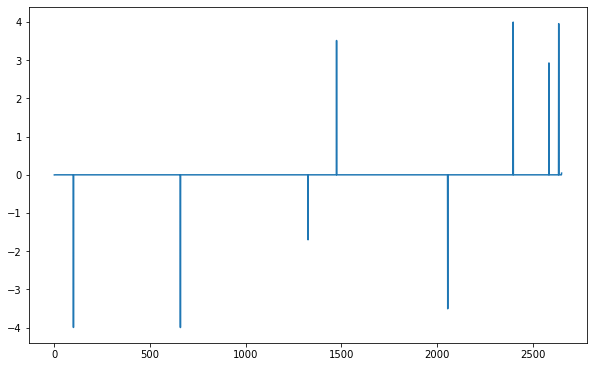

In [53]:
plt.plot(native_phi-my_new_phi)

In [43]:
def phi_gxxxg_v4_well(res_list, neighbor_list, parameter_list):
    min_seq_sep = 10
    r_min = 2.0
    r_max = 6.5
    kappa = 5
    n_parameters = 2652
    info_list = []
    get_distance_between_two_residues = get_interaction_distance_com
    phi_gxxxg_well = np.zeros(n_parameters)
    for res1globalindex, res1 in enumerate(res_list):
        res1index = get_local_index(res1)
        res1chain = get_chain(res1)
        for res2 in get_neighbors_within_radius(neighbor_list, res1, r_max+2.0):
            res2index = get_local_index(res2)
            res2chain = get_chain(res2)
            res2globalindex = get_global_index(res_list, res2)

            if res2globalindex - res1globalindex >= min_seq_sep or (res1chain != res2chain and res2globalindex > res1globalindex):
                rij = get_distance_between_two_residues(res1, res2)
                res1_2_globalindex = res1globalindex+4
                res1_2 = get_res_by_globalindex(res_list, res1_2_globalindex, res1chain)
                for shift_to_res2_2, direction in zip([-4, 4], ["anti", "parallel"]):
                    # consider parallel, and anti-parallel.
                    res2_2_globalindex = res2globalindex + shift_to_res2_2
                    res2_2 = get_res_by_globalindex(res_list, res2_2_globalindex, res2chain)
                    if res1_2 == -1 or res2_2 == -1:
                        continue
                    rij_2 = get_distance_between_two_residues(res1_2, res2_2)
                    if rij_2 > (r_max+2):
                        continue
                    # interaction_index = get_interaction_index_from_four_residues(res1.resname, res1_2.resname, res2.resname, res2_2.resname)
                    # interaction_index = get_interaction_index_from_four_residues_v2(res1.resname, res1_2.resname, res2.resname, res2_2.resname)
                    interaction_index = get_interaction_index_from_four_residues_v4(res1.resname, res1_2.resname, res2.resname, res2_2.resname, direction)
                    phi_ = interaction_well(rij, r_min, r_max, kappa) * interaction_well(rij_2, r_min, r_max, kappa)
                    # phi_gxxxg_well[interaction_index] += phi_
                    phi_gxxxg_well[interaction_index] += phi_
                # print(info_)
    phis_to_return = []
    for i in range(n_parameters):
        phis_to_return.append(round(phi_gxxxg_well[i],4))
    return phis_to_return

In [50]:
def phi_debug(structure, gamma, get_interaction_index, n_parameters=2652, sequence=None):
    res_list = get_res_list(structure)
    neighbor_list = get_neighbor_list(structure)
    if sequence is None:
        sequence = get_sequence_from_structure(structure)

    min_seq_sep = 10
    r_min = 2.0
    r_max = 6.5
    kappa = 5
    # n_parameters = 1 + max(interaction_index_dic.values()) + 1
    info_list = []
    get_distance_between_two_residues = get_interaction_distance_com
    phi_gxxxg_well = np.zeros(n_parameters)

    e_gxxxg = 0.0
    e_gxxxg_parallel = 0.0
    e_gxxxg_anti_parallel = 0.0
    phi_gxxxg_well = np.zeros(n_parameters)
    for res1globalindex, res1 in enumerate(res_list):
        res1index = get_local_index(res1)
        res1chain = get_chain(res1)
        for res2 in get_neighbors_within_radius(neighbor_list, res1, r_max+2.0):
            res2index = get_local_index(res2)
            res2chain = get_chain(res2)
            res2globalindex = get_global_index(res_list, res2)

            for shift_to_res2_2, direction in zip([-4, 4], ["anti", "parallel"]):
                res1_2_globalindex = res1globalindex + 4
                res1_2 = get_res_by_globalindex(res_list, res1_2_globalindex, res1chain)
                # for shift_to_res2_2 in [-4, 4]:

                # consider parallel, and anti-parallel.
                res2_2_globalindex = res2globalindex + shift_to_res2_2
                res2_2 = get_res_by_globalindex(res_list, res2_2_globalindex, res2chain)
                if res1_2 == -1 or res2_2 == -1:
                    continue
                if direction == "parallel":
                    sep = res1globalindex - res2globalindex
                elif direction == "anti":
                    sep = res1globalindex - res2_2_globalindex
                if sep >= min_seq_sep or (res1chain != res2chain and res2globalindex > res1globalindex):
                    rij = get_distance_between_two_residues(res1, res2)

                    rij_2 = get_distance_between_two_residues(res1_2, res2_2)
    #                 if rij_2 > (r_max+2):
    #                     continue
                    resName_1_1 = one_to_three(sequence[res1globalindex])
                    resName_1_2 = one_to_three(sequence[res1_2_globalindex])
                    resName_2_1 = one_to_three(sequence[res2globalindex])
                    resName_2_2 = one_to_three(sequence[res2_2_globalindex])
                    # interaction_index = get_interaction_index_from_four_residues(res1.resname, res1_2.resname, res2.resname, res2_2.resname)
                    # interaction_index = get_interaction_index_from_four_residues_v2(resName_1_1, resName_1_2, resName_2_1, resName_2_2)
                    interaction_index = get_interaction_index(resName_1_1, resName_1_2, resName_2_1, resName_2_2, direction)
                    phi_ = interaction_well(rij, r_min, r_max, kappa) * interaction_well(rij_2, r_min, r_max, kappa)
                    # phi_gxxxg_well[interaction_index] += phi_
                    phi_gxxxg_well[interaction_index] += phi_
                    # print(res1globalindex, res2globalindex, resName_1_1, resName_2_1, gamma[interaction_index], phi_)
    phis_to_return = []
    for i in range(n_parameters):
        phis_to_return.append(round(phi_gxxxg_well[i],4))
    return phis_to_return

In [10]:
def compute_gxxxg_energy(structure, gamma, get_interaction_index, n_parameters=2652, sequence=None):
    res_list = get_res_list(structure)
    neighbor_list = get_neighbor_list(structure)
    if sequence is None:
        sequence = get_sequence_from_structure(structure)

    min_seq_sep = 10
    r_min = 2.0
    r_max = 6.5
    kappa = 5
    # n_parameters = 1 + max(interaction_index_dic.values()) + 1
    info_list = []
    get_distance_between_two_residues = get_interaction_distance_com
    phi_gxxxg_well = np.zeros(n_parameters)

    e_gxxxg = 0.0
    e_gxxxg_parallel = 0.0
    e_gxxxg_anti_parallel = 0.0

    for res1globalindex, res1 in enumerate(res_list):
        res1index = get_local_index(res1)
        res1chain = get_chain(res1)
        for res2 in get_neighbors_within_radius(neighbor_list, res1, r_max+2.0):
            res2index = get_local_index(res2)
            res2chain = get_chain(res2)
            res2globalindex = get_global_index(res_list, res2)

            for shift_to_res2_2, direction in zip([-4, 4], ["anti", "parallel"]):
                res1_2_globalindex = res1globalindex + 4
                res1_2 = get_res_by_globalindex(res_list, res1_2_globalindex, res1chain)
                # for shift_to_res2_2 in [-4, 4]:

                # consider parallel, and anti-parallel.
                res2_2_globalindex = res2globalindex + shift_to_res2_2
                res2_2 = get_res_by_globalindex(res_list, res2_2_globalindex, res2chain)
                if res1_2 == -1 or res2_2 == -1:
                    continue
                if direction == "parallel":
                    sep = res1globalindex - res2globalindex
                elif direction == "anti":
                    sep = res1globalindex - res2_2_globalindex
                if sep >= min_seq_sep or (res1chain != res2chain and res2globalindex > res1globalindex):
                    rij = get_distance_between_two_residues(res1, res2)

                    rij_2 = get_distance_between_two_residues(res1_2, res2_2)
    #                 if rij_2 > (r_max+2):
    #                     continue
                    resName_1_1 = one_to_three(sequence[res1globalindex])
                    resName_1_2 = one_to_three(sequence[res1_2_globalindex])
                    resName_2_1 = one_to_three(sequence[res2globalindex])
                    resName_2_2 = one_to_three(sequence[res2_2_globalindex])
                    # interaction_index = get_interaction_index_from_four_residues(res1.resname, res1_2.resname, res2.resname, res2_2.resname)
                    # interaction_index = get_interaction_index_from_four_residues_v2(resName_1_1, resName_1_2, resName_2_1, resName_2_2)
                    interaction_index = get_interaction_index(resName_1_1, resName_1_2, resName_2_1, resName_2_2, direction)
                    phi_ = interaction_well(rij, r_min, r_max, kappa) * interaction_well(rij_2, r_min, r_max, kappa)
                    # phi_gxxxg_well[interaction_index] += phi_
                    if shift_to_res2_2 == -4:
                        e_gxxxg_anti_parallel += gamma[interaction_index] * phi_
                    else:
                        e_gxxxg_parallel += gamma[interaction_index] * phi_
                    # print(res1globalindex, res2globalindex, resName_1_1, resName_2_1, gamma[interaction_index], phi_)
    e_gxxxg = e_gxxxg_parallel + e_gxxxg_anti_parallel
    return e_gxxxg

In [352]:
def encode_four_body_index(res1_1, res1_2, res2_1, res2_2, direction):
    # if anti-parallel, the order by reading from res2_2 to res2_1
    if direction == "anti":
        res2 = three_to_index(res2_2)*20 + three_to_index(res2_1)
        Res2_letter = res2_2 + "_" + res2_1
    elif direction == "parallel":
        res2 = three_to_index(res2_1)*20 + three_to_index(res2_2)
        Res2_letter = res2_1 + "_" + res2_2
    res1 = three_to_index(res1_1)*20 + three_to_index(res1_2)
    Res1_letter = res1_1 + "_" + res1_2
    # if res2 index is smaller than res1, We will swtich the index. to ensure res1 is less than res2.
    if res2 < res1:
        return res2, res1, Res1_letter, Res2_letter
    else:
        return res1, res2, Res1_letter, Res2_letter

b_cutoff_unique = pd.read_csv("/Users/weilu/Research/data/interaction_index_jul12.csv", index_col=0)

interaction_index_dic = {}
c = 0
for index in b_cutoff_unique["interaction_index"].to_list():
    interaction_index_dic[index] = c
    c += 1

def get_interaction_index_from_four_residues_v3(res1_1, res1_2, res2_1, res2_2, direction, interaction_index_dic=interaction_index_dic):
    res1, res2, Res1_letter, Res2_letter = encode_four_body_index(res1_1, res1_2, res2_1, res2_2, direction)
    try:
        index = interaction_index_dic[f"{direction}_{res1}_{res2}"]
    except:
        index = max(interaction_index_dic.values()) + 1
    return index


def encode_resName(data):
    # if anti-parallel, the order by reading from res2_2 to res2_1
    res1_1 = data["Res1_1"]
    res1_2 = data["Res1_2"]
    res2_1 = data["Res2_1"]
    res2_2 = data["Res2_2"]
    direction = data["Direction"]
    res1, res2, Res1_letter, Res2_letter = encode_four_body_index(res1_1, res1_2, res2_1, res2_2, direction)
    data["Res1"] = res1
    data["Res1_letter"] = Res1_letter
    data["Res2"] = res2
    data["Res2_letter"] = Res2_letter
    return data

# fileLocation = "/Users/weilu/Research/server/jul_week1_2020/decoyN2000_gxxxg_shuffle_optimization/optimization_decoyN2000/gammas/filtered_protein_list_phi_gxxxg_v2_well126_gamma"
# gamma = np.loadtxt(fileLocation)
fileLocation = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/gxxxg_701.dat"
gamma = np.loadtxt(fileLocation)
pre = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/run1/1j4n"
sequence = read_fasta(f"{pre}/crystal_structure.fasta")
# gamma = gamma *0 + 1
pdb = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/cleaned_pdbs/1j4n"
structure = parse_pdb(pdb)
compute_gxxxg_energy(structure, -gamma, get_interaction_index_from_four_residues_v3, sequence=sequence)




-56.54042844206833

In [156]:
chosen.shape

(50, 5)

In [157]:
chosen.groupby("res1")["order"].sum().reset_index().sort_values("order")

,res1,order
7,THR,4657.0
4,MET,4705.0
6,SER,5389.0
5,PHE,13847.0
1,GLY,23013.0
8,VAL,23854.0
2,ILE,24193.0
0,ALA,33019.0
3,LEU,38671.0


In [158]:
chosen.groupby("res2")["order"].sum().reset_index().sort_values("order")

,res2,order
8,TYR,2079.0
6,SER,5060.0
4,MET,6613.0
7,THR,10963.0
5,PHE,15389.0
1,GLY,16696.0
2,ILE,22968.0
9,VAL,25427.0
0,ALA,28861.0
3,LEU,37292.0


In [123]:
info.query("i==105")

,i,res1,res2,order
105,105,GLY,GLY,6447.0


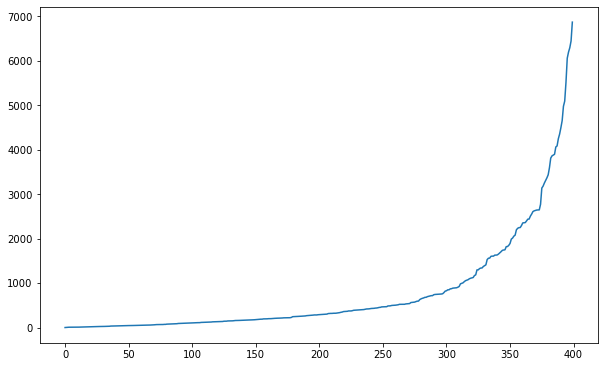

In [132]:
table = para_table
plt.plot(np.sum(table, axis=0)[np.argsort(np.sum(table, axis=0))])

In [246]:
table = para_table
c = table[np.argsort(-np.sum(table, axis=0),)][:,np.argsort(-np.sum(table, axis=1))]


In [273]:
info_ = []
for i in range(400):
    for j in range(i, 400):
        if c[i][j] > 100:
            res1_1, res1_2 = para_info.query(f"index=={i}")[["res1", "res2"]].values[0]
            res2_1, res2_2 = para_info.query(f"index=={j}")[["res1", "res2"]].values[0]
            info_.append([i, j, res1_1, res1_2, res2_1, res2_2, c[i][j]])
info_ = pd.DataFrame(info_, columns=["i", "j", "res1_1", "res1_2", "res2_1", "res2_2", "c"])

## this may be an interesting outlier. 
## for now, I will ignore it, and focus on the top 50 from the 400 based index.

In [275]:
info_.query("i > 100 and i < 150 and c > 400")

,i,j,res1_1,res1_2,res2_1,res2_2,c
178,122,133,ARG,TRP,HIS,LEU,407.0
179,128,137,ASP,THR,ASP,LYS,421.0


In [ ]:
plt.rcParams['figure.figsize'] = 4*np.array([10,6.180])    #golden ratio

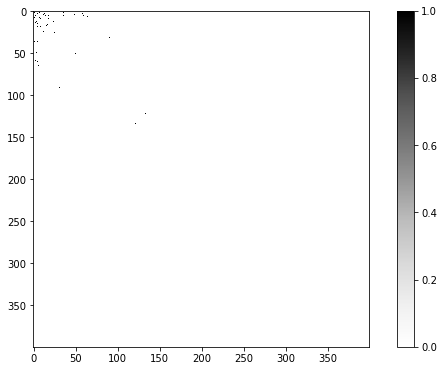

In [247]:
plt.imshow((c>400), cmap="Greys", vmin=0)
plt.colorbar()

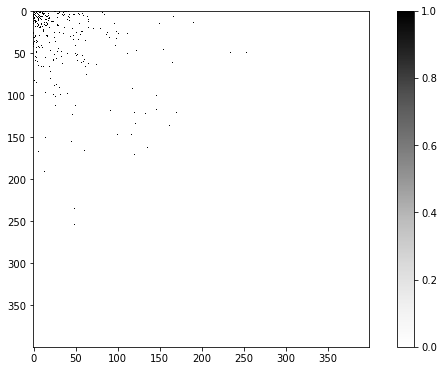

In [276]:
plt.imshow((c>100), cmap="Greys", vmin=0)
plt.colorbar()

In [227]:
para_info.query("index==270")

,index,i,res1,res2,order,Direction
270,270,49,ASP,LEU,538.0,parallel


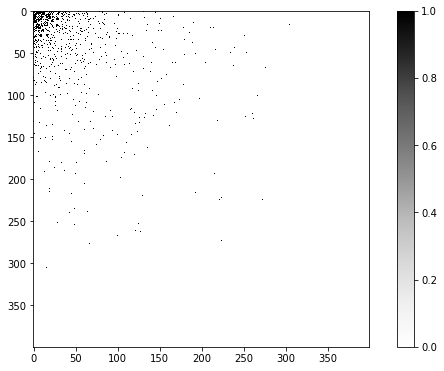

In [248]:
plt.imshow(c>50, cmap="Greys", vmin=0)
plt.colorbar()

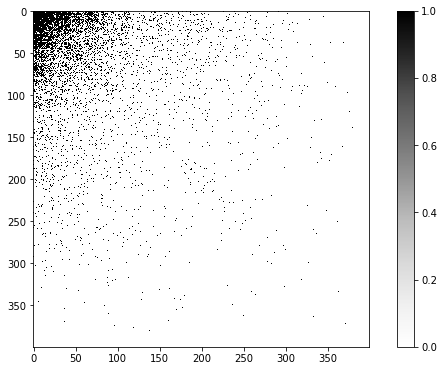

In [249]:
plt.imshow(c>10, cmap="Greys", vmin=0)
plt.colorbar()

In [61]:
plt.rcParams['figure.figsize'] = 1*np.array([10,6.180])    #golden ratio

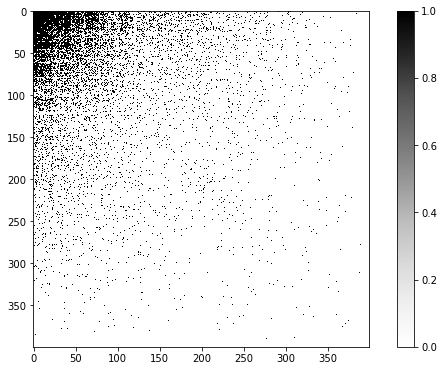

In [250]:
plt.imshow(c>5, cmap="Greys", vmin=0)
plt.colorbar()

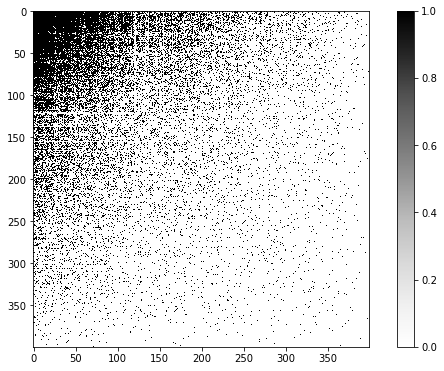

In [251]:
plt.imshow(c>0, cmap="Greys", vmin=0)
plt.colorbar()

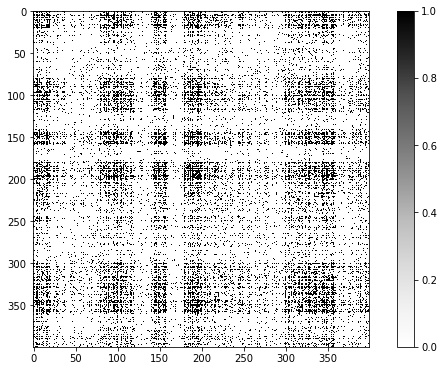

In [252]:
plt.imshow(para_table > 0, cmap="Greys", vmin=0)
plt.colorbar()

In [39]:
anti_table = np.zeros((400,400))
for i, line in b.query("Direction=='anti'").iterrows():
    x = line["Res1"]
    y = line["Res2"]
    anti_table[x][y] += line["Protein"]
    anti_table[y][x] += line["Protein"]

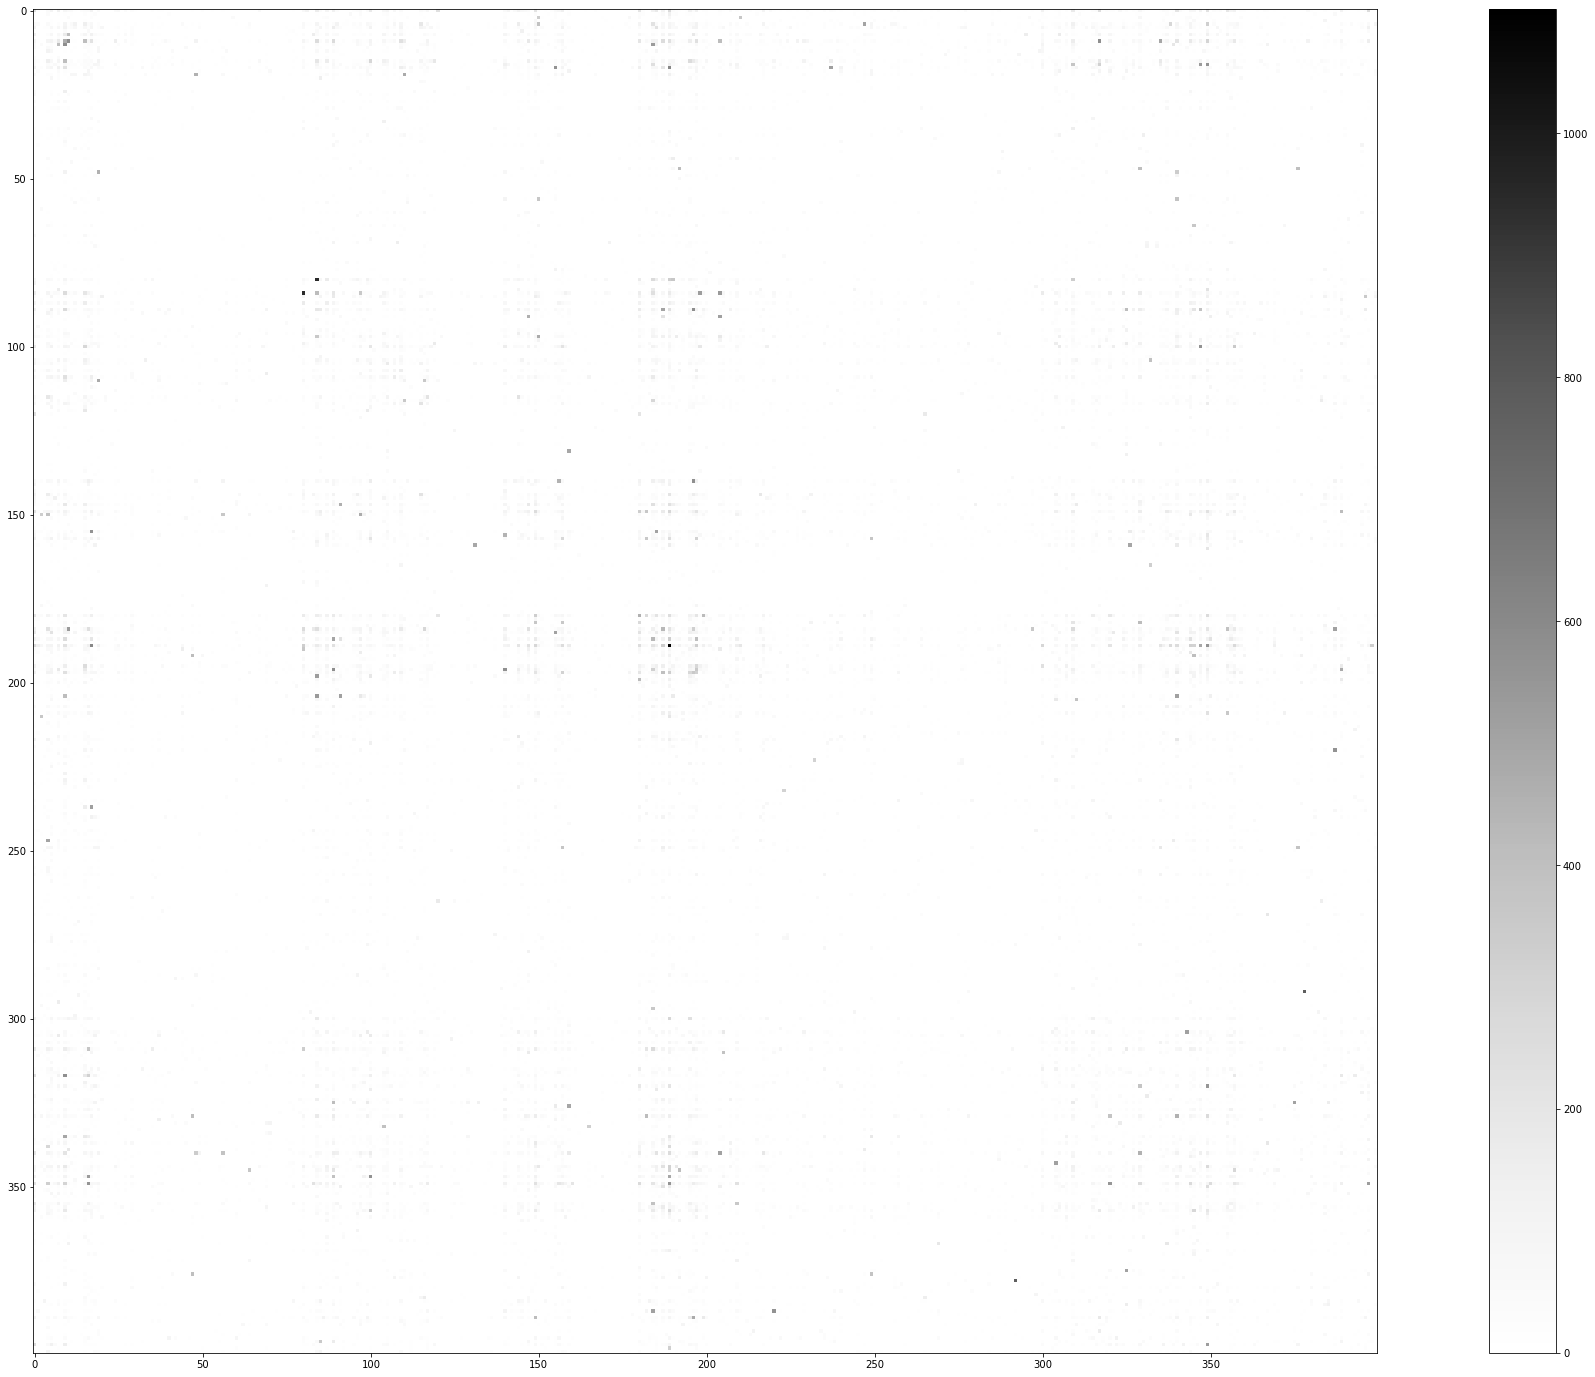

In [42]:
plt.imshow(table, cmap="Greys", vmin=0)
plt.colorbar()

In [17]:
a.query("Protein <= 5").shape

(24571, 6)

In [16]:
a.query("Protein > 5")

,Res1_1,Res1_2,Res2_1,Res2_2,Direction,Protein
37971,VAL,GLY,GLY,PHE,parallel,6
38885,VAL,MET,CYS,GLY,anti,6
27350,PRO,ILE,ALA,HIS,parallel,6
21724,MET,ASN,ILE,TRP,parallel,6
2151,ALA,MET,PHE,PHE,parallel,6
...,...,...,...,...,...,...
13796,ILE,GLY,ILE,GLY,parallel,660
31922,THR,GLY,THR,GLY,parallel,701
34821,TRP,TRP,PRO,ARG,anti,771
23804,PHE,ALA,PHE,PHE,anti,892


In [11]:
data_selected

,index,Index1_1,Res1_1,Index2_1,Res2_1,Index1_2,Res1_2,Index2_2,Res2_2,Res1,Chain1,Res2,Chain2,rij,rij_2,Protein,Direction,interaction_index,code
0,11,5,MET,52,LEU,9,ILE,48,PHE,44,A,95,A,6.376584,6.274799,3cap,anti,12,301
1,13,5,MET,48,PHE,9,ILE,44,VAL,44,A,91,A,5.375535,5.421462,3cap,anti,12,301
2,22,8,LEU,48,PHE,12,GLY,44,VAL,47,A,91,A,4.412404,5.269533,3cap,anti,77,100201
3,24,9,ILE,49,THR,13,PHE,45,PHE,48,A,92,A,5.495952,5.990161,3cap,anti,39,10102
4,30,12,GLY,44,VAL,16,ASN,40,ASP,51,A,87,A,5.269533,3.804606,3cap,anti,76,100120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461627,2277753,555,LEU,748,THR,559,PHE,752,ALA,317,B,681,B,5.458916,5.365570,6c96,parallel,58,20101
461628,2277757,558,VAL,748,THR,562,PHE,752,ALA,320,B,681,B,4.720123,4.583742,6c96,parallel,58,20101
461629,2277758,558,VAL,752,ALA,562,PHE,756,GLU,320,B,685,B,5.797050,5.380803,6c96,parallel,40,10111
461630,2277779,601,TYR,639,ALA,605,LEU,643,LEU,480,B,519,B,5.407334,5.468802,6c96,parallel,42,10201


In [3]:
gamma = np.loadtxt("/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/gxxxg_701.dat")

In [5]:
gamma[-1]

1.407

In [6]:
gamma -= gamma[-1]

In [7]:
gamma

array([-6.180e-01, -3.320e-01, -3.800e-01, -2.620e-01, -1.011e+00,
       -4.830e-01, -3.300e-01, -7.260e-01, -5.810e-01, -1.127e+00,
       -4.130e-01, -2.630e-01, -3.010e-01, -5.540e-01, -1.062e+00,
       -2.880e-01, -2.890e-01, -7.130e-01, -8.380e-01, -5.100e-01,
       -5.680e-01, -3.470e-01, -2.800e-01, -3.520e-01, -7.040e-01,
       -8.070e-01, -4.130e-01, -2.740e-01, -4.100e-01, -6.860e-01,
       -2.320e-01, -2.810e-01, -5.070e-01, -9.910e-01, -3.170e-01,
       -1.123e+00, -4.470e-01, -3.200e-01, -3.140e-01, -8.710e-01,
       -3.730e-01, -5.600e-01, -5.980e-01, -5.400e-01, -2.910e-01,
       -3.910e-01, -4.590e-01, -9.950e-01, -4.920e-01, -5.470e-01,
       -9.220e-01, -4.570e-01, -6.350e-01, -4.700e-01, -2.550e-01,
       -6.290e-01, -3.880e-01, -3.570e-01, -5.300e-01, -4.890e-01,
       -9.610e-01, -1.090e+00, -9.200e-01, -5.680e-01, -6.170e-01,
       -6.600e-01, -2.490e-01, -9.510e-01, -7.540e-01, -3.020e-01,
       -6.930e-01, -2.960e-01, -4.720e-01, -3.340e-01, -5.150e

In [8]:
np.savetxt("/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/gxxxg_701_center.dat", gamma, fmt="%.3f")

In [ ]:
def get_filtered_gamma(pre, cutoff, pp):
    # pp = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0"
    # pp = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"

    A_name = pp + "_A"
    B_name = pp + "_B"
    B_filtered_name = pp + "_B_filtered"
    P_name = pp + "_P"
    Gamma_name = pp + "_gamma"
    Gamma_filtered_name = pp + "_gamma_filtered"


    A = np.loadtxt(pre+A_name)
    B = np.loadtxt(pre+B_name)
    B_filtered = np.loadtxt(pre+B_filtered_name, dtype=complex, converters={
                               0: lambda s: complex(s.decode().replace('+-', '-'))})
    Gamma = np.loadtxt(pre+Gamma_name)
    Gamma_filtered = np.loadtxt(pre+Gamma_filtered_name, dtype=complex, converters={
                               0: lambda s: complex(s.decode().replace('+-', '-'))})

    half_B_name = pp + "_half_B"
    half_B = np.loadtxt(pre+half_B_name)
    other_half_B_name = pp + "_other_half_B"
    other_half_B = np.loadtxt(pre+other_half_B_name)
    std_half_B_name = pp + "_std_half_B"
    std_half_B = np.loadtxt(pre+std_half_B_name)


    # pre = "/Users/weilu/Research/server/april_2019/"
    # location = pre + f"../../phis/{pp}_phi_decoy_summary.txt"
    location = pre + pp + "_A_prime"
    A_prime = np.loadtxt(location)

    lamb, P = np.linalg.eig(B)
    lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)
    filtered_lamb = np.copy(lamb)
    cutoff_mode = cutoff
    filtered_B_inv, filtered_lamb, P = get_filtered_B_inv_lambda_and_P(filtered_lamb,
                                                                       cutoff_mode, P)
    filtered_gamma = np.dot(filtered_B_inv, A)
    filtered_B = np.linalg.inv(filtered_B_inv)

    return A, A_prime, filtered_gamma, filtered_B_inv